<a href="https://colab.research.google.com/github/Bonnnana/Introduction-to-Data-Science/blob/main/Lab/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
data = pd.read_csv("/content/pollution_dataset.csv")

In [4]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [5]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [6]:
numerical_features=data.drop(columns=["Air Quality"])

In [7]:
numerical_features.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')

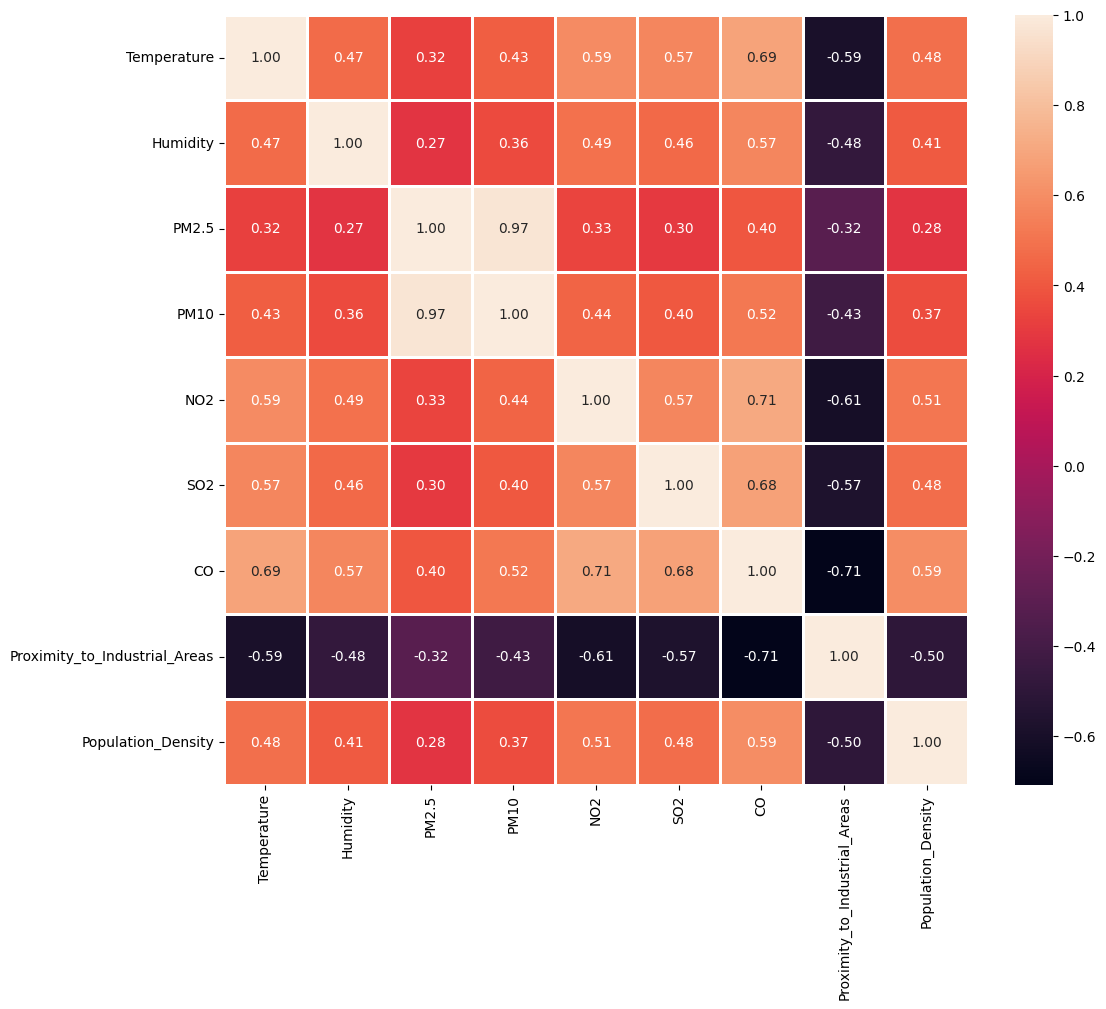

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_features.columns].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Air Quality', ylabel='count'>

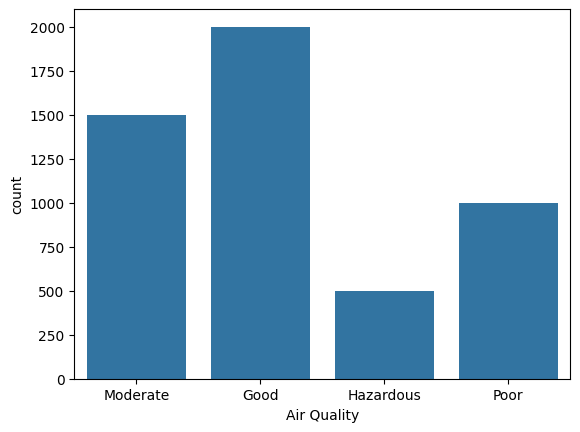

In [9]:
sns.countplot(data, x="Air Quality")

In [10]:
X = data.drop(columns=["Air Quality"])
Y = data["Air Quality"]

In [12]:
encoder = OrdinalEncoder(categories=[['Good', 'Moderate', 'Poor', 'Hazardous']]) # we are predicting pollution

In [13]:
data['Air Quality Encoded'] = encoder.fit_transform(data[['Air Quality']])

In [14]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,1.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,1.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,1.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,0.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,3.0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,1.0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,1.0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,0.0


In [15]:
Y_encoded = data['Air Quality Encoded']

In [16]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [17]:
under_sampler = RandomUnderSampler(random_state=42)
train_X, train_Y = under_sampler.fit_resample(train_X, train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [18]:
pd.Series(train_Y).value_counts()

,count
Air Quality Encoded,
0.0,389
1.0,389
2.0,389
3.0,389


In [19]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [20]:
X.shape[1]

9

In [21]:
Y.shape

(5000,)

### Model 1

In [22]:
model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="relu"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

In [23]:
model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [24]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,852 (11.14 KB)

 Trainable params: 2,852 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history1 = model1.fit(train_X, train_Y, validation_split=0.1, epochs=50, batch_size=10)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4280 - loss: 1.3359 - val_accuracy: 0.0000e+00 - val_loss: 1.0350
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.6557 - val_accuracy: 0.5192 - val_loss: 0.8351
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.3785 - val_accuracy: 0.7821 - val_loss: 0.5412
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.3373 - val_accuracy: 0.7500 - val_loss: 0.5719
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.3001 - val_accuracy: 0.6026 - val_loss: 0.8919
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9232 - loss: 0.2368 - val_accuracy: 0.6795 - val_loss: 0.7011
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2456 - val_accuracy: 0.7179 - val_loss: 0.6474
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.2474 - val_accuracy

<Axes: >

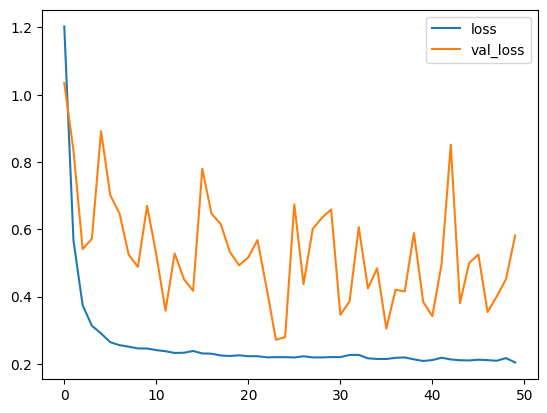

In [26]:
sns.lineplot(history1.history['loss'], label='loss')
sns.lineplot(history1.history['val_loss'], label='val_loss')

In [27]:
pred_y_1 = model1.predict(test_X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
pred_y_1

array([[1.15735324e-32, 3.28878009e-08, 2.27144752e-02, 9.77285504e-01],
       [9.98745501e-01, 1.25454797e-03, 1.46574719e-09, 4.62082612e-17],
       [1.41674690e-02, 9.85676825e-01, 1.55648013e-04, 1.90839802e-10],
       ...,
       [1.96264467e-12, 3.35918397e-01, 6.63294554e-01, 7.87101686e-04],
       [6.63215702e-04, 9.98607278e-01, 7.29550549e-04, 3.13687898e-09],
       [8.38494954e-18, 1.07679218e-02, 9.71552312e-01, 1.76796615e-02]],
      dtype=float32)

In [29]:
pred_y_1_classes = np.argmax(pred_y_1, axis=1)
pred_y_1_classes

array([3, 0, 1, 3, 0, 3, 0, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1,
       1, 3, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 3, 1, 2, 1, 3, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 3, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 3, 1, 2, 1, 1, 3, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 3,
       0, 1, 0, 1, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 2, 0, 3, 0, 0, 2, 1, 0,
       2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [30]:
target_names=['Good', 'Moderate', 'Poor', 'Hazardous']

In [31]:
print(classification_report(test_Y, pred_y_1_classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.95      0.95      0.95       294
         2.0       0.82      0.88      0.85       186
         3.0       0.93      0.78      0.85       111

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [32]:
print(classification_report(test_Y, pred_y_1_classes, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.95      0.95      0.95       294
        Poor       0.82      0.88      0.85       186
   Hazardous       0.93      0.78      0.85       111

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000



<Axes: >

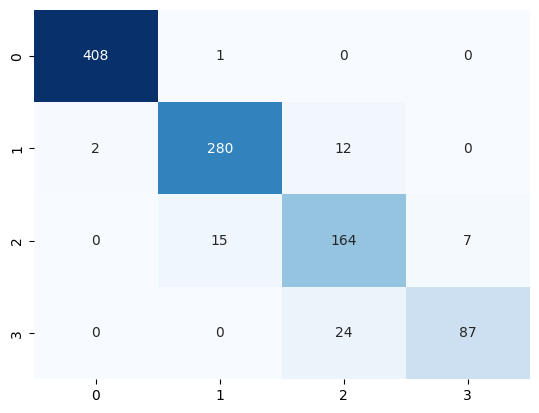

In [52]:
cm1 = confusion_matrix(test_Y, pred_y_1_classes)
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", cbar=False)

### Model 2

In [35]:
model2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="relu"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.1),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

In [36]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [37]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,316 (12.95 KB)

 Trainable params: 3,316 (12.95 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history2 = model2.fit(train_X, train_Y, validation_split=0.1, epochs=30, batch_size=8)

Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3785 - loss: 1.3404 - val_accuracy: 0.9167 - val_loss: 0.7185
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.5945 - val_accuracy: 0.5449 - val_loss: 0.8354
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.3946 - val_accuracy: 0.6603 - val_loss: 0.7149
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3498 - val_accuracy: 0.6538 - val_loss: 0.7872
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss: 0.3123 - val_accuracy: 0.6154 - val_loss: 0.8286
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3265 - val_accuracy: 0.9551 - val_loss: 0.1857
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3247 - val_accuracy: 0.9487 - val_loss: 0.2558
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2691 - val_accuracy: 0.

<Axes: >

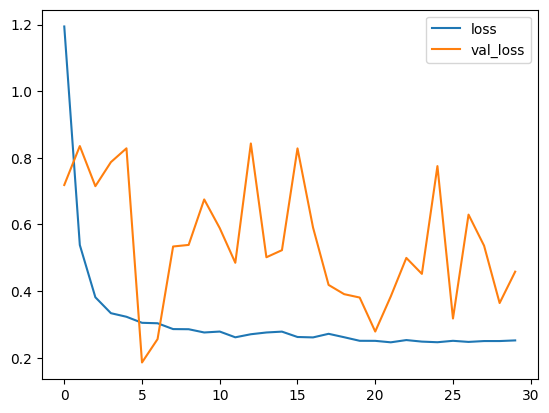

In [39]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [40]:
pred_y_2 = model2.predict(test_X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
pred_y_2_classes = np.argmax(pred_y_2, axis=1)
pred_y_2_classes

array([3, 0, 1, 3, 0, 3, 0, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 3, 1,
       1, 3, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 3, 1, 2, 1, 3, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 3, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 3, 1, 3, 1, 1, 3, 2,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 3,
       0, 1, 0, 1, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 2, 0, 3, 0, 0, 2, 1, 0,
       2, 1, 0, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [43]:
print(classification_report(test_Y, pred_y_2_classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       0.95      0.96      0.95       294
         2.0       0.85      0.86      0.85       186
         3.0       0.89      0.84      0.87       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000



In [44]:
print(classification_report(test_Y, pred_y_2_classes, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.95      0.96      0.95       294
        Poor       0.85      0.86      0.85       186
   Hazardous       0.89      0.84      0.87       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000



<Axes: >

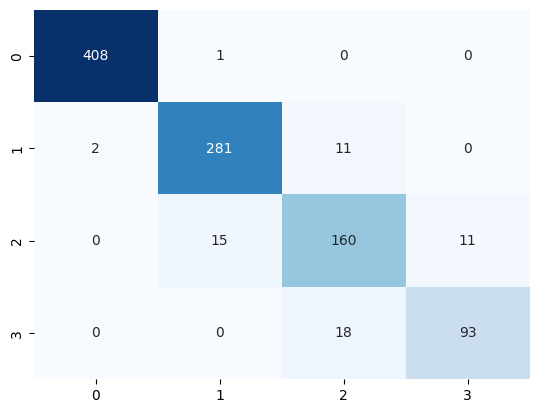

In [53]:
cm2 = confusion_matrix(test_Y, pred_y_2_classes)
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", cbar=False)

### Model 3

In [45]:
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Air Quality Encoded
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,1.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,1.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,1.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,0.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,3.0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,1.0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,1.0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,0.0


In [54]:
X = data.drop(columns=["Air Quality"])
Y = data["Air Quality Encoded"]

In [55]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(Y, num_classes=4)

print("One-hot encoded labels:")
print(y_train_one_hot)


One-hot encoded labels:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [56]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y_train_one_hot, test_size=0.2, random_state=42)

In [118]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dropout(0.3),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax")
])

In [119]:
model3.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [120]:
model3.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948 (3.70 KB)

 Trainable params: 948 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
history3 = model3.fit(train_X, train_Y, validation_split=0.1, epochs=30, batch_size=8)

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4398 - loss: 1.2590 - val_accuracy: 0.7200 - val_loss: 0.6165
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 0.6297 - val_accuracy: 0.8000 - val_loss: 0.5044
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7649 - loss: 0.5224 - val_accuracy: 0.8725 - val_loss: 0.4286
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7868 - loss: 0.4904 - val_accuracy: 0.7600 - val_loss: 0.4934
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7959 - loss: 0.4636 - val_accuracy: 0.8525 - val_loss: 0.4022
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.4285 - val_accuracy: 0.7525 - val_loss: 0.5033
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8311 - loss: 0.4076 - val_accuracy: 0.9100 - val_loss: 0.3335
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8370 - loss: 0.3862 - val_accuracy: 0.

<Axes: >

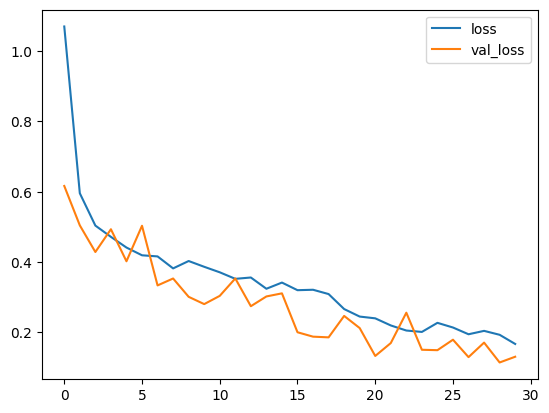

In [128]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')

In [129]:
pred_y_3 = model3.predict(test_X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [130]:
pred_y_3_classes = np.argmax(pred_y_3, axis=1)
pred_y_3_classes

array([3, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 3, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 3, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 1, 3, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1, 2, 3,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 3,
       0, 1, 0, 1, 0, 1, 3, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 3, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [131]:
test_Y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [132]:
test_Y_classes = np.argmax(test_Y, axis=1)

In [127]:
print(classification_report(test_Y_classes, pred_y_3_classes, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       1.00      1.00      1.00       294
        Poor       0.76      0.99      0.86       186
   Hazardous       1.00      0.49      0.65       111

    accuracy                           0.94      1000
   macro avg       0.94      0.87      0.88      1000
weighted avg       0.95      0.94      0.93      1000



<Axes: >

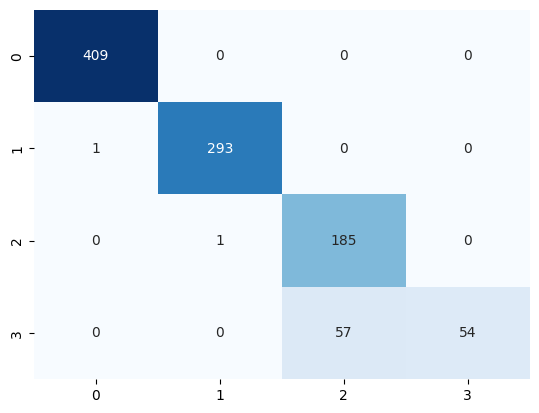

In [134]:
cm3 = confusion_matrix(test_Y_classes, pred_y_3_classes)
sns.heatmap(cm3, annot=True, cmap="Blues", fmt="d", cbar=False)

### Model 4

In [149]:
X = data.drop(columns=['Air Quality'])
Y_encoded = data['Air Quality Encoded']

In [150]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [172]:
model4 = Sequential([
    Dense(32, activation='relu', input_dim=train_X.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [173]:
model4.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
    )

In [174]:
model4.fit(train_X, train_Y, validation_split=0.1, epochs=50, batch_size=16)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1315.1353 - mae: 22.4447 - val_loss: 2.9916 - val_mae: 1.3618
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6559 - mae: 1.2959 - val_loss: 1.5882 - val_mae: 0.9814
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4598 - mae: 0.9599 - val_loss: 0.8946 - val_mae: 0.7564
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8269 - mae: 0.7132 - val_loss: 0.4359 - val_mae: 0.5385
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3807 - mae: 0.4831 - val_loss: 0.2414 - val_mae: 0.3945
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2312 - mae: 0.3649 - val_loss: 0.1636 - val_mae: 0.3264
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1567 - mae: 0.3006 - val_loss: 0.1152 - val_mae: 0.2688
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1134 - mae: 0.2544 - val_loss: 0.1002 - val_mae: 0.2564
Epoch 9/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [175]:
pred_y_4 = model4.predict(test_X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [176]:
pred_y_4

array([[3.4315882 ],
       [0.10054235],
       [1.1614025 ],
       [3.3072267 ],
       [0.13071088],
       [3.3900843 ],
       [0.10541992],
       [0.08132724],
       [0.14726119],
       [1.1970272 ],
       [1.2860289 ],
       [0.14829616],
       [2.3724494 ],
       [0.18413167],
       [1.2790599 ],
       [0.11796813],
       [0.12060504],
       [0.0646929 ],
       [1.1773455 ],
       [2.2643054 ],
       [0.12300758],
       [0.15101938],
       [2.2657688 ],
       [1.2308667 ],
       [0.1819077 ],
       [2.3706436 ],
       [0.12876897],
       [0.15666251],
       [1.22593   ],
       [1.1035697 ],
       [0.10510401],
       [2.2841406 ],
       [2.2069206 ],
       [1.2469497 ],
       [1.2261927 ],
       [1.2872512 ],
       [1.298356  ],
       [1.2265277 ],
       [1.1469212 ],
       [0.14704232],
       [2.2381024 ],
       [1.2382076 ],
       [3.4713144 ],
       [0.06820802],
       [0.09916143],
       [1.2283452 ],
       [1.276084  ],
       [2.367

In [177]:
pred_y_4_classes = pred_y_4.round().astype(int)

In [178]:
pred_y_4_classes

array([[3],
       [0],
       [1],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [3],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [3],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [3],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
    

In [170]:
test_Y

,Air Quality Encoded
1501,3.0
2586,0.0
2653,1.0
1055,3.0
705,0.0
...,...
4711,1.0
2313,0.0
3214,2.0
2732,1.0


In [185]:
print(classification_report(test_Y, pred_y_4_classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       409
         1.0       1.00      1.00      1.00       294
         2.0       1.00      0.98      0.99       186
         3.0       0.97      0.94      0.95       111
         4.0       0.00      0.00      0.00         0

    accuracy                           0.99      1000
   macro avg       0.79      0.78      0.79      1000
weighted avg       1.00      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

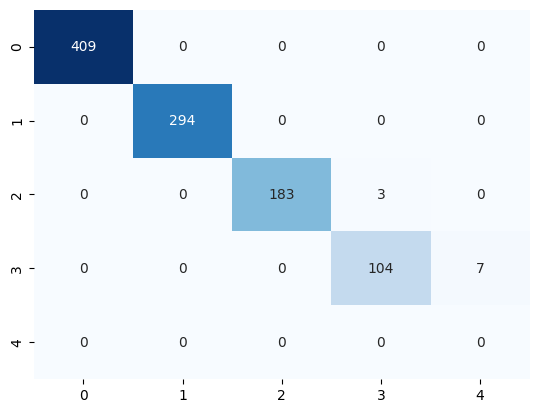

In [180]:
cm4 = confusion_matrix(test_Y, pred_y_4_classes)
sns.heatmap(cm4, annot=True, cmap="Blues", fmt="d", cbar=False)